#Lab1: Hadoop Distributed File System (HDFS)
### Student Name : eslamfayez
### Student ID: 212002370

In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Lab Goals:
   1. Quick Overview of Hadoop Storage and processing components.
   2. Learn how Hadoop Distributed File System (HDFS) stores data across a cluster.
   3. Get familiar with using HDFS using hdfs commands or Hue file browser.
   4. Practice and submit MapReduce jobs. 
   
## Lab Tasks:
   1. Use the Hue file browser to view and manage files.
   2. Hadoop MapReduce example.
     

# Introduction:
### Hadoop custer main components:
   Hadoop cluster has three main components as in the figure below. We are going to explore the storage component (HDFS), and processing Component (Map Reduce) in this lab.

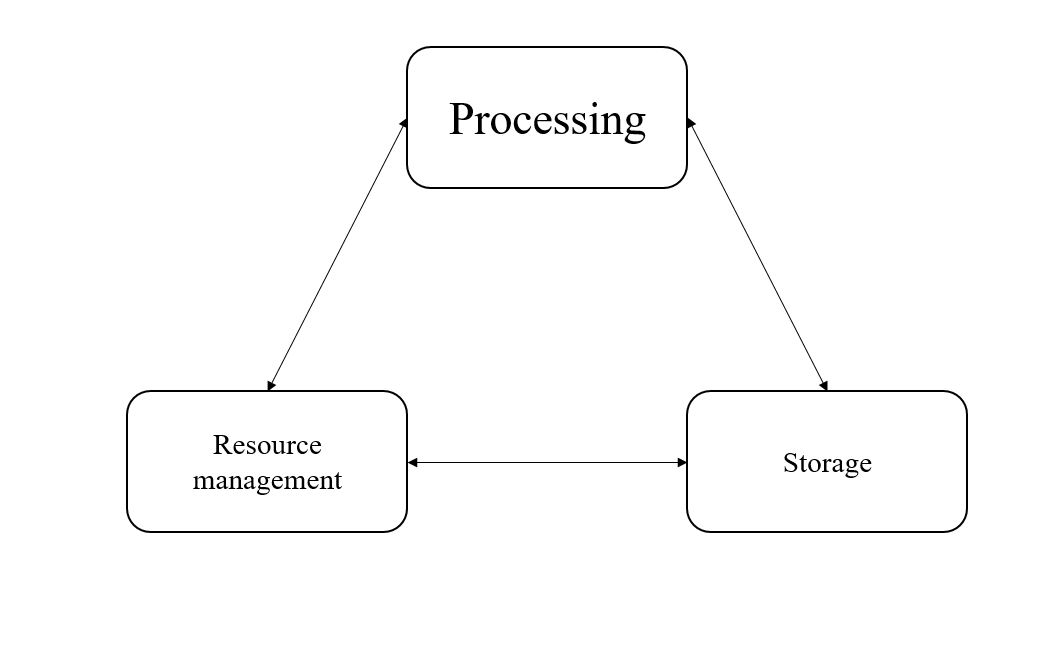

In [35]:
from IPython.display import Image
Image(filename="/home/cloudera/img/Cluster_components.PNG")

   
### HDFS basics:
   HDFS is the hadoop distributed file system which is written in java and it is based on google file system GFS. it lies on top of a native file system such as ext3 or ext4. <br> In the cluster, there will be a <b>NameNode</b> which stores meta-data of data blocks, and <b>DataNodes</b> which contain the actual data blocks. For the sake of fault tolerance, HDFS stores redundant copies of each data block (by default = 3). 


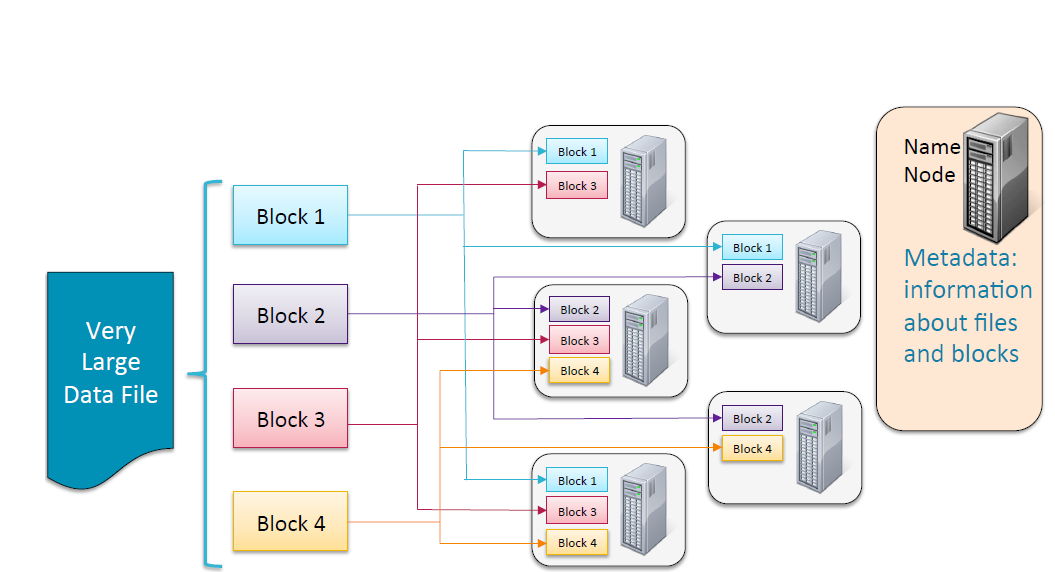

In [36]:
#Image(filename="/home/cloudera/img/HowFilesStored.PNG")


### Storing and retreiving files in HDFS:
   Files are split into 128 MB blocks by default and each block is replicated in multipe data nodes.
  

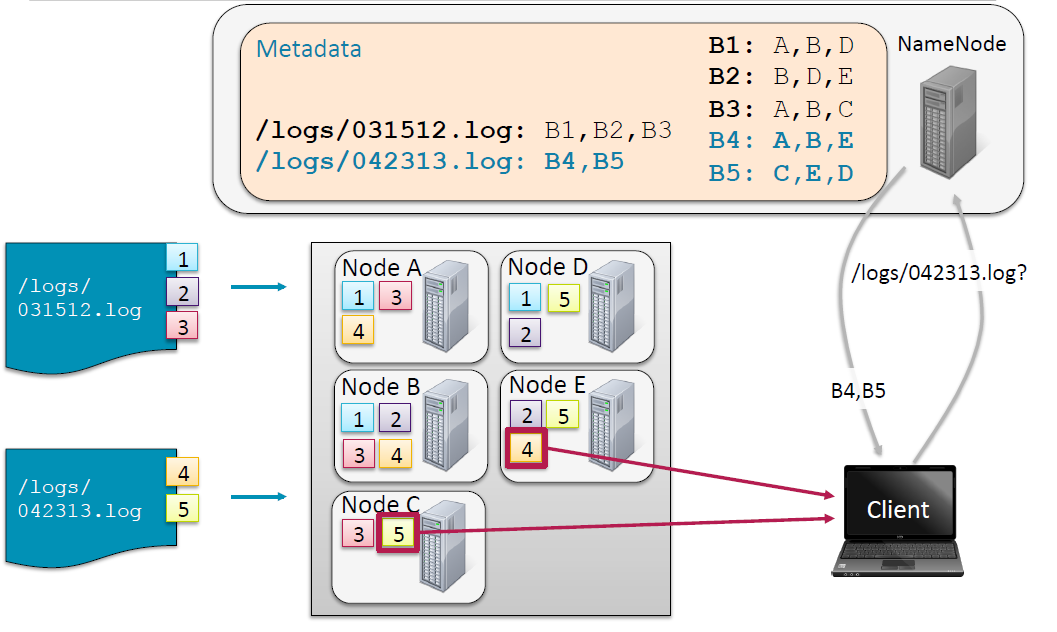

In [37]:
#Image(filename="/home/cloudera/img/StoringAndRetreiving.PNG")

### HDFS best practices:
    It is recommended that HDFS repository is organized carefully and you define a standrd structure for your directory. For example:  
    /user – data of a single user
    /tmp – Temporary data shared between multiple users.
    /etl – Work in progress in a stage of etl.

# Command Line access to HDFS:
## FsShell commands [$ hdfs dfs]:
In the VM terminal, you can use commands like the following:

Function | Command
-----|---------------
Copy *file1.txt* from local directory to hfds   |\\$ hdfs dfs -put *file1.txt* /*dir/file1.txt* 
Copy file to local directory *dir* andchange name to *file2.txt*   |\\$ hdfs dfs -get /*dir/file1.txt*  *file2.txt* 
Create directory *dire1*  |\\$ hdfs dfs -mkdir *dire1*
Delete directory *dire1*  |\\$ hdfs dfs -rm -r *dire1*
List UP file in a directory *dir*  |\\$ hdfs dfs -ls /dir 
List up the files in hdfs root directory  |\\$ hdfs dfs -ls /
display content in file *file1.txt*  |\\$ hdfs dfs -cat /*dir*/*file1.txt*

<font color = "red"><b>Note: In HDFS, relative paths are relative to the home directory in our case /user/hadoop/.</b></font>
    

## Task 1: Use Hue to manage your files:
The Hue HDFS file browser is an open source file browser built by Cloudera. It allows managing your HDFS directories and files from an easy graphical web user interface. <br>
Hue can be accessed from <a href="http://127.0.0.1:8888/filebrowser/">port 8888 on local host</a>

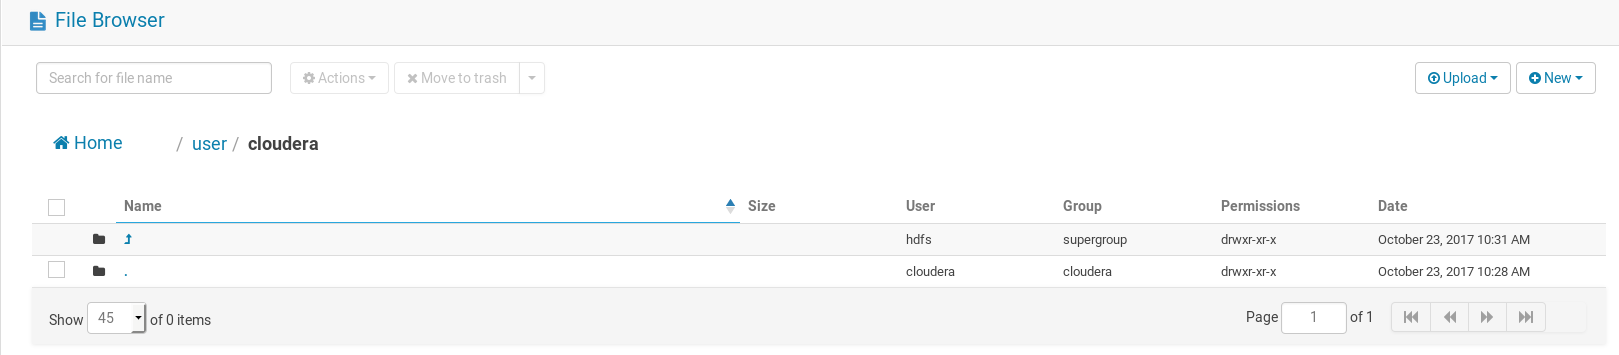

In [38]:
#Image(filename="/home/cloudera/img/Hue.PNG")

In [1]:
#Task1 Answer
#Add here your screenshot

In [1]:
!pwd

/home/bitnami


## Task 2

### Task 2.1: Running Hadoop MapReduce (word count example):

To run this example, you need to extract the zip file attached with the assignment file on Moodle. <br>

1.In your local directory ```/home/bitnami```, create a folder called ```Labs``` and then subfolder ```Lab1```. Move the downloaded zip file to ```Lab1``` and then extract it. <br>

<p>
In this task, we are going to run a simple example that count words frequency using Hadoop MapReduce. <br>
We will start by using hdfs commands to create a directory for our input.<br>

1. create a directory with name "hdfslab1": <br>
```hdfs dfs -mkdir hdfsLab1``` <br><br>

2. Create a subdirectory "input":<br>
```hdfs dfs -mkdir  hdfsLab1/input``` <br><br>

3. Change the local directroy to "Labs/Lab1": <br>
```cd /home/bitnami/Labs/Lab1/```<br><br>

4. Move the file "AliceInWonderLandPart1.txt", in the extracted folder, to the hdfs cluster: <br>
```hdfs dfs -put /home/bitnami/labs/lab1/StopWords.txt /user/hadoop/hdfsLab1/input2``` <br><br>

5. Now it is time to run our first MapReduce example "wordcount" using the following command: <br>
```hadoop jar /home/bitnami/labs/lab1/WordCount.jar ee.ut.cs.dsg.bigdatamanagement.WordCount /user/hadoop/hdfsLab1/input2 /user/hadoop/hdfsLab1/output3 ```
hdfs dfs -put /home/bitnami/labs/lab1/StopWords.txt /user/hadoop/hdfsLab1/input

In [ ]:
#you can copy and past the commands in the terminal
!sudo hdfs dfs -mkdir /home/bitnami/hdfsLab1

!sudo hdfs dfs -mkdir hdfsLab1/input

!sudo hdfs dfs -put /home/bitnami/Labs/Lab1/AliceInWonderLandPart1.txt hdfsLab1/input
!sudo hdfs dfs -put /home/bitnami/Labs/Lab1/StopWords.txt hdfsLab1/input2
hadoop fs -cat StopWords.txt | head
hadoop fs -ls /home/bitnami/Labs/Lab1/StopWords.txt | head -10
hadoop jar /home/bitnami/labs/lab1/WordCount.jar ee.ut.cs.dsg.bigdatamanagement.WordCount /user/hadoop/hdfsLab1/input /user/hadoop/hdfsLab1/output2

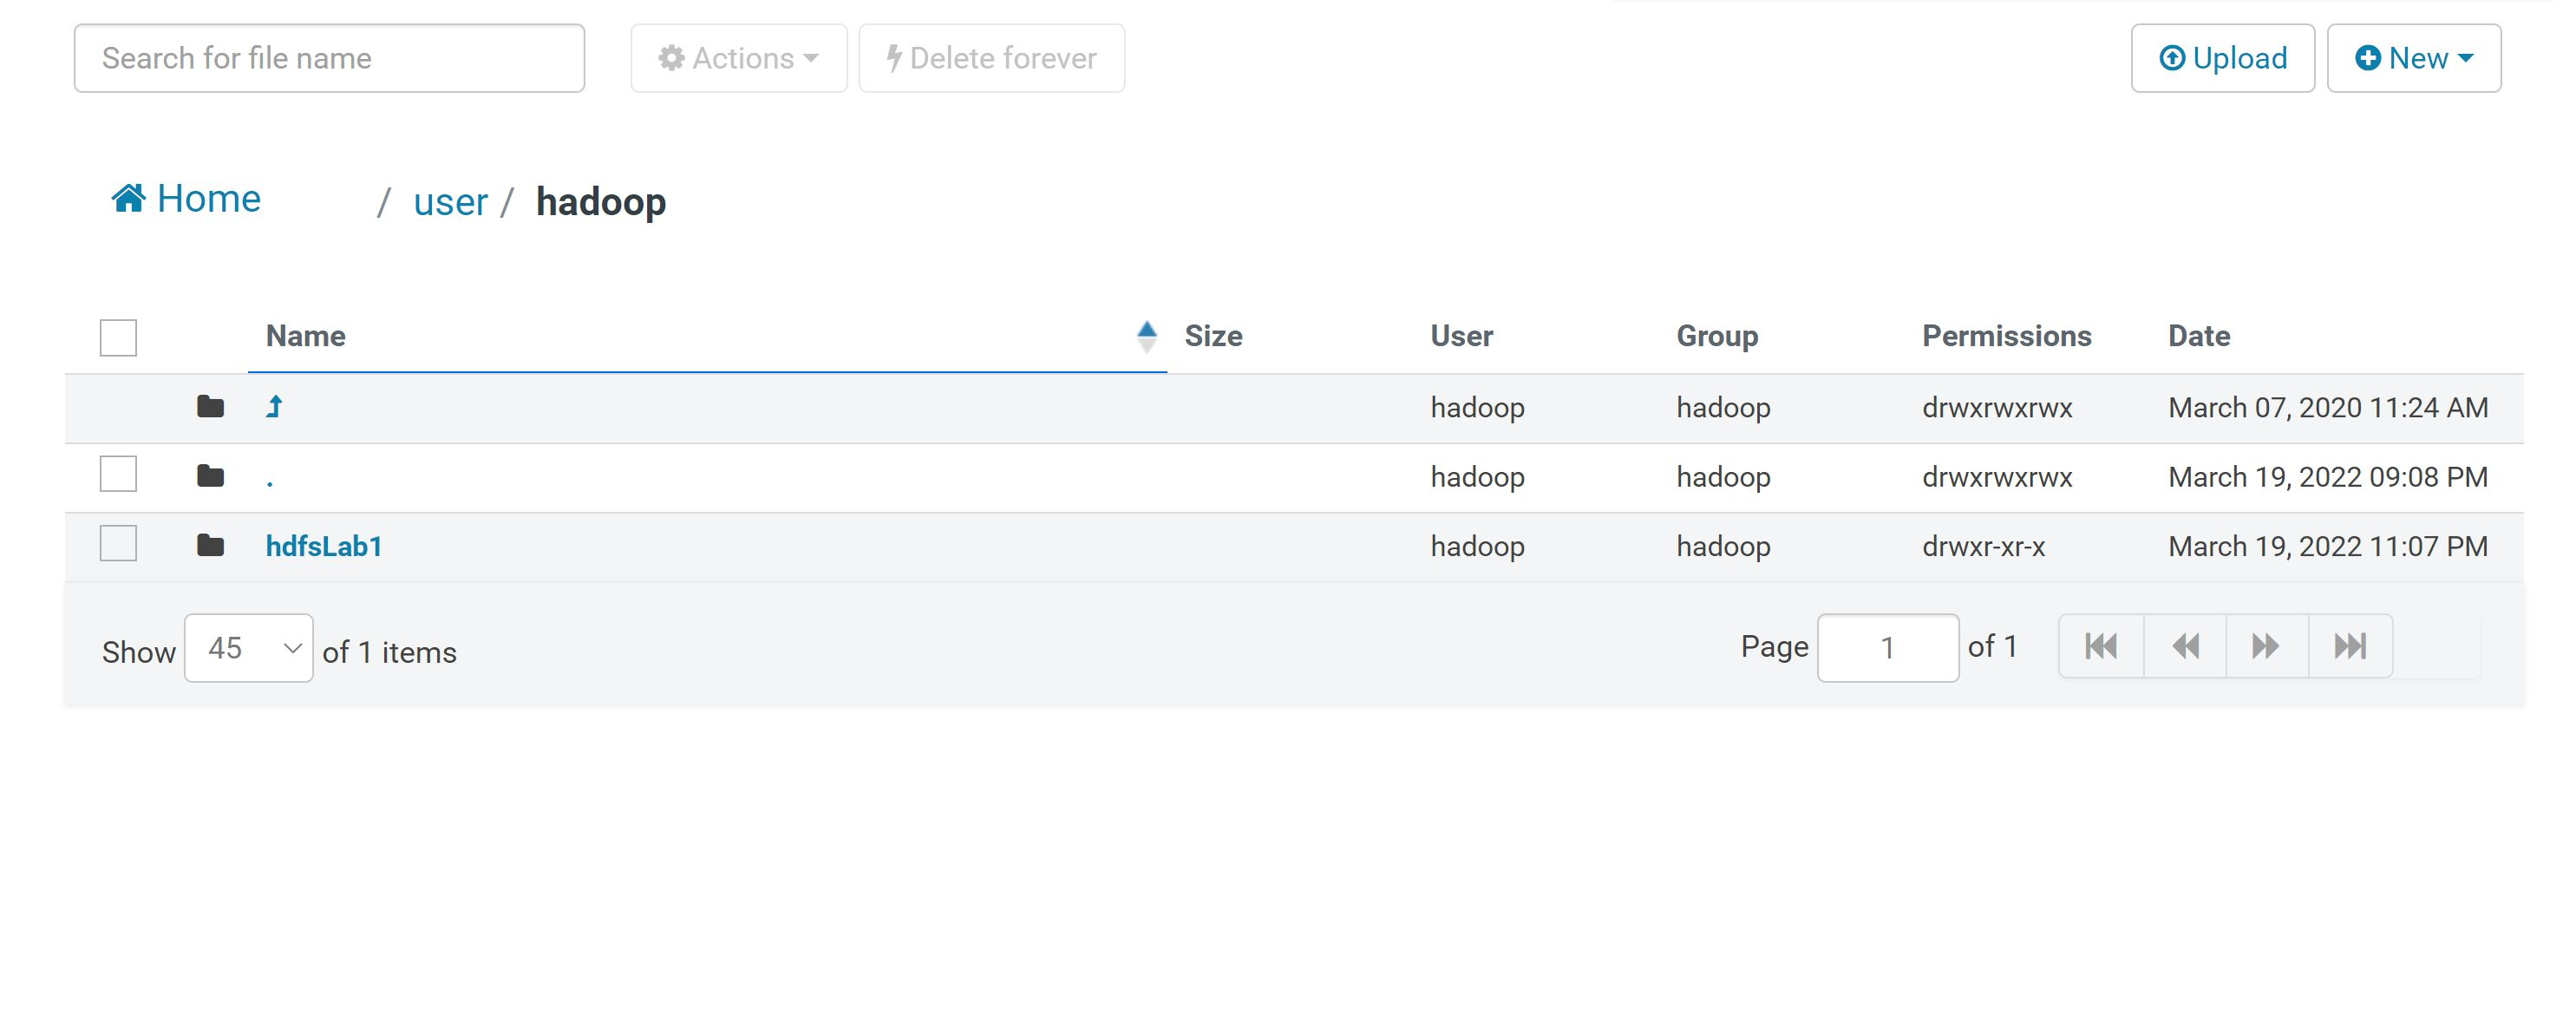

In [2]:
#After running each command check with listing hdfs files and Add here the screenshots
#screenshot1
from IPython.display import Image
Image(filename='hdfslab1.JPG')

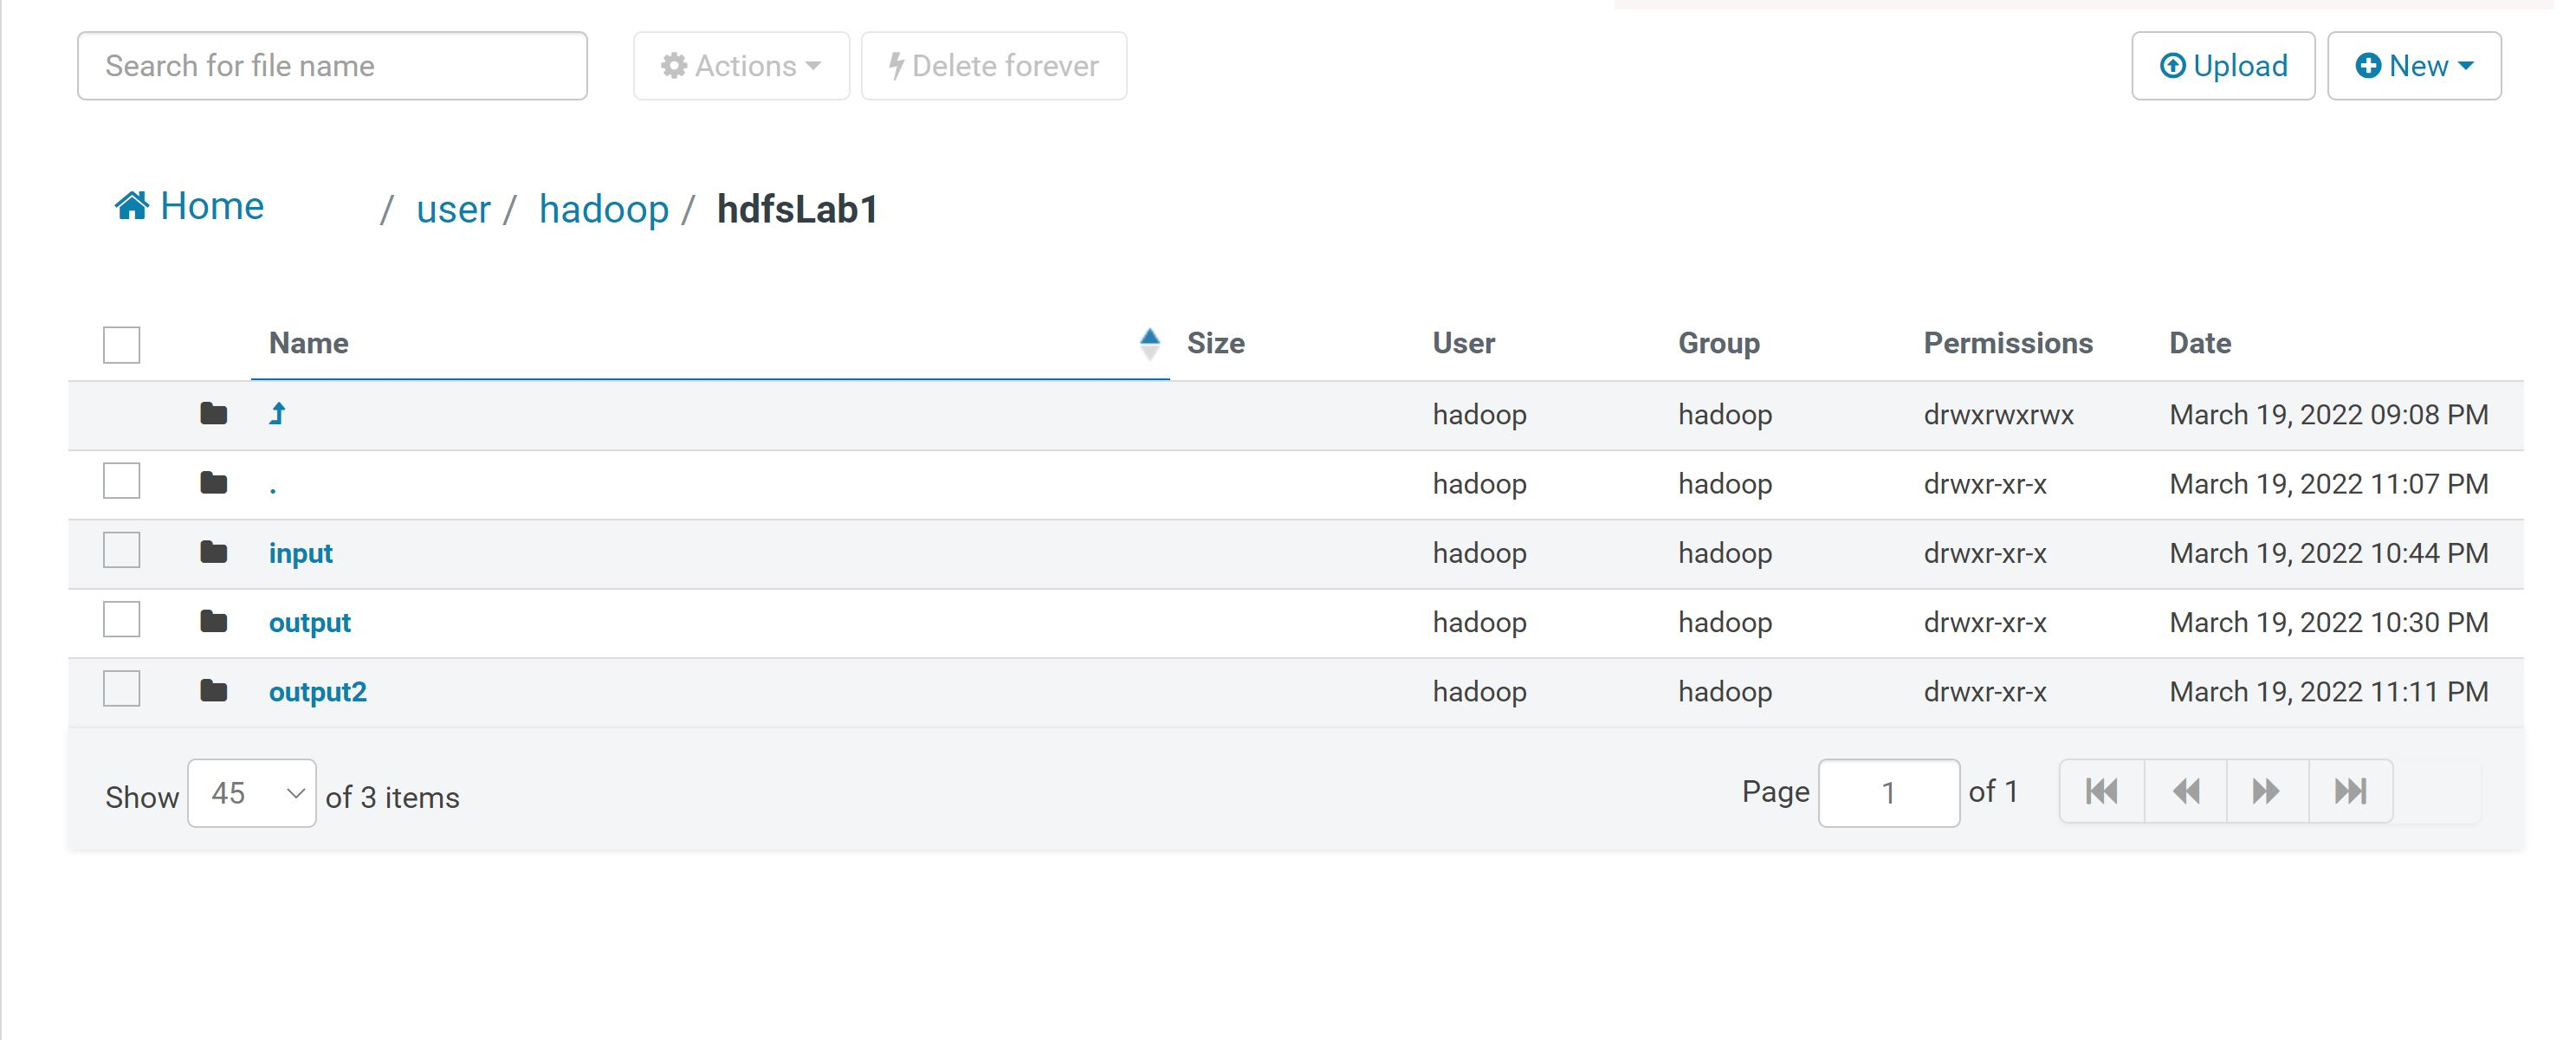

In [4]:
#screenshot2
from IPython.display import Image
Image(filename='input.JPG')

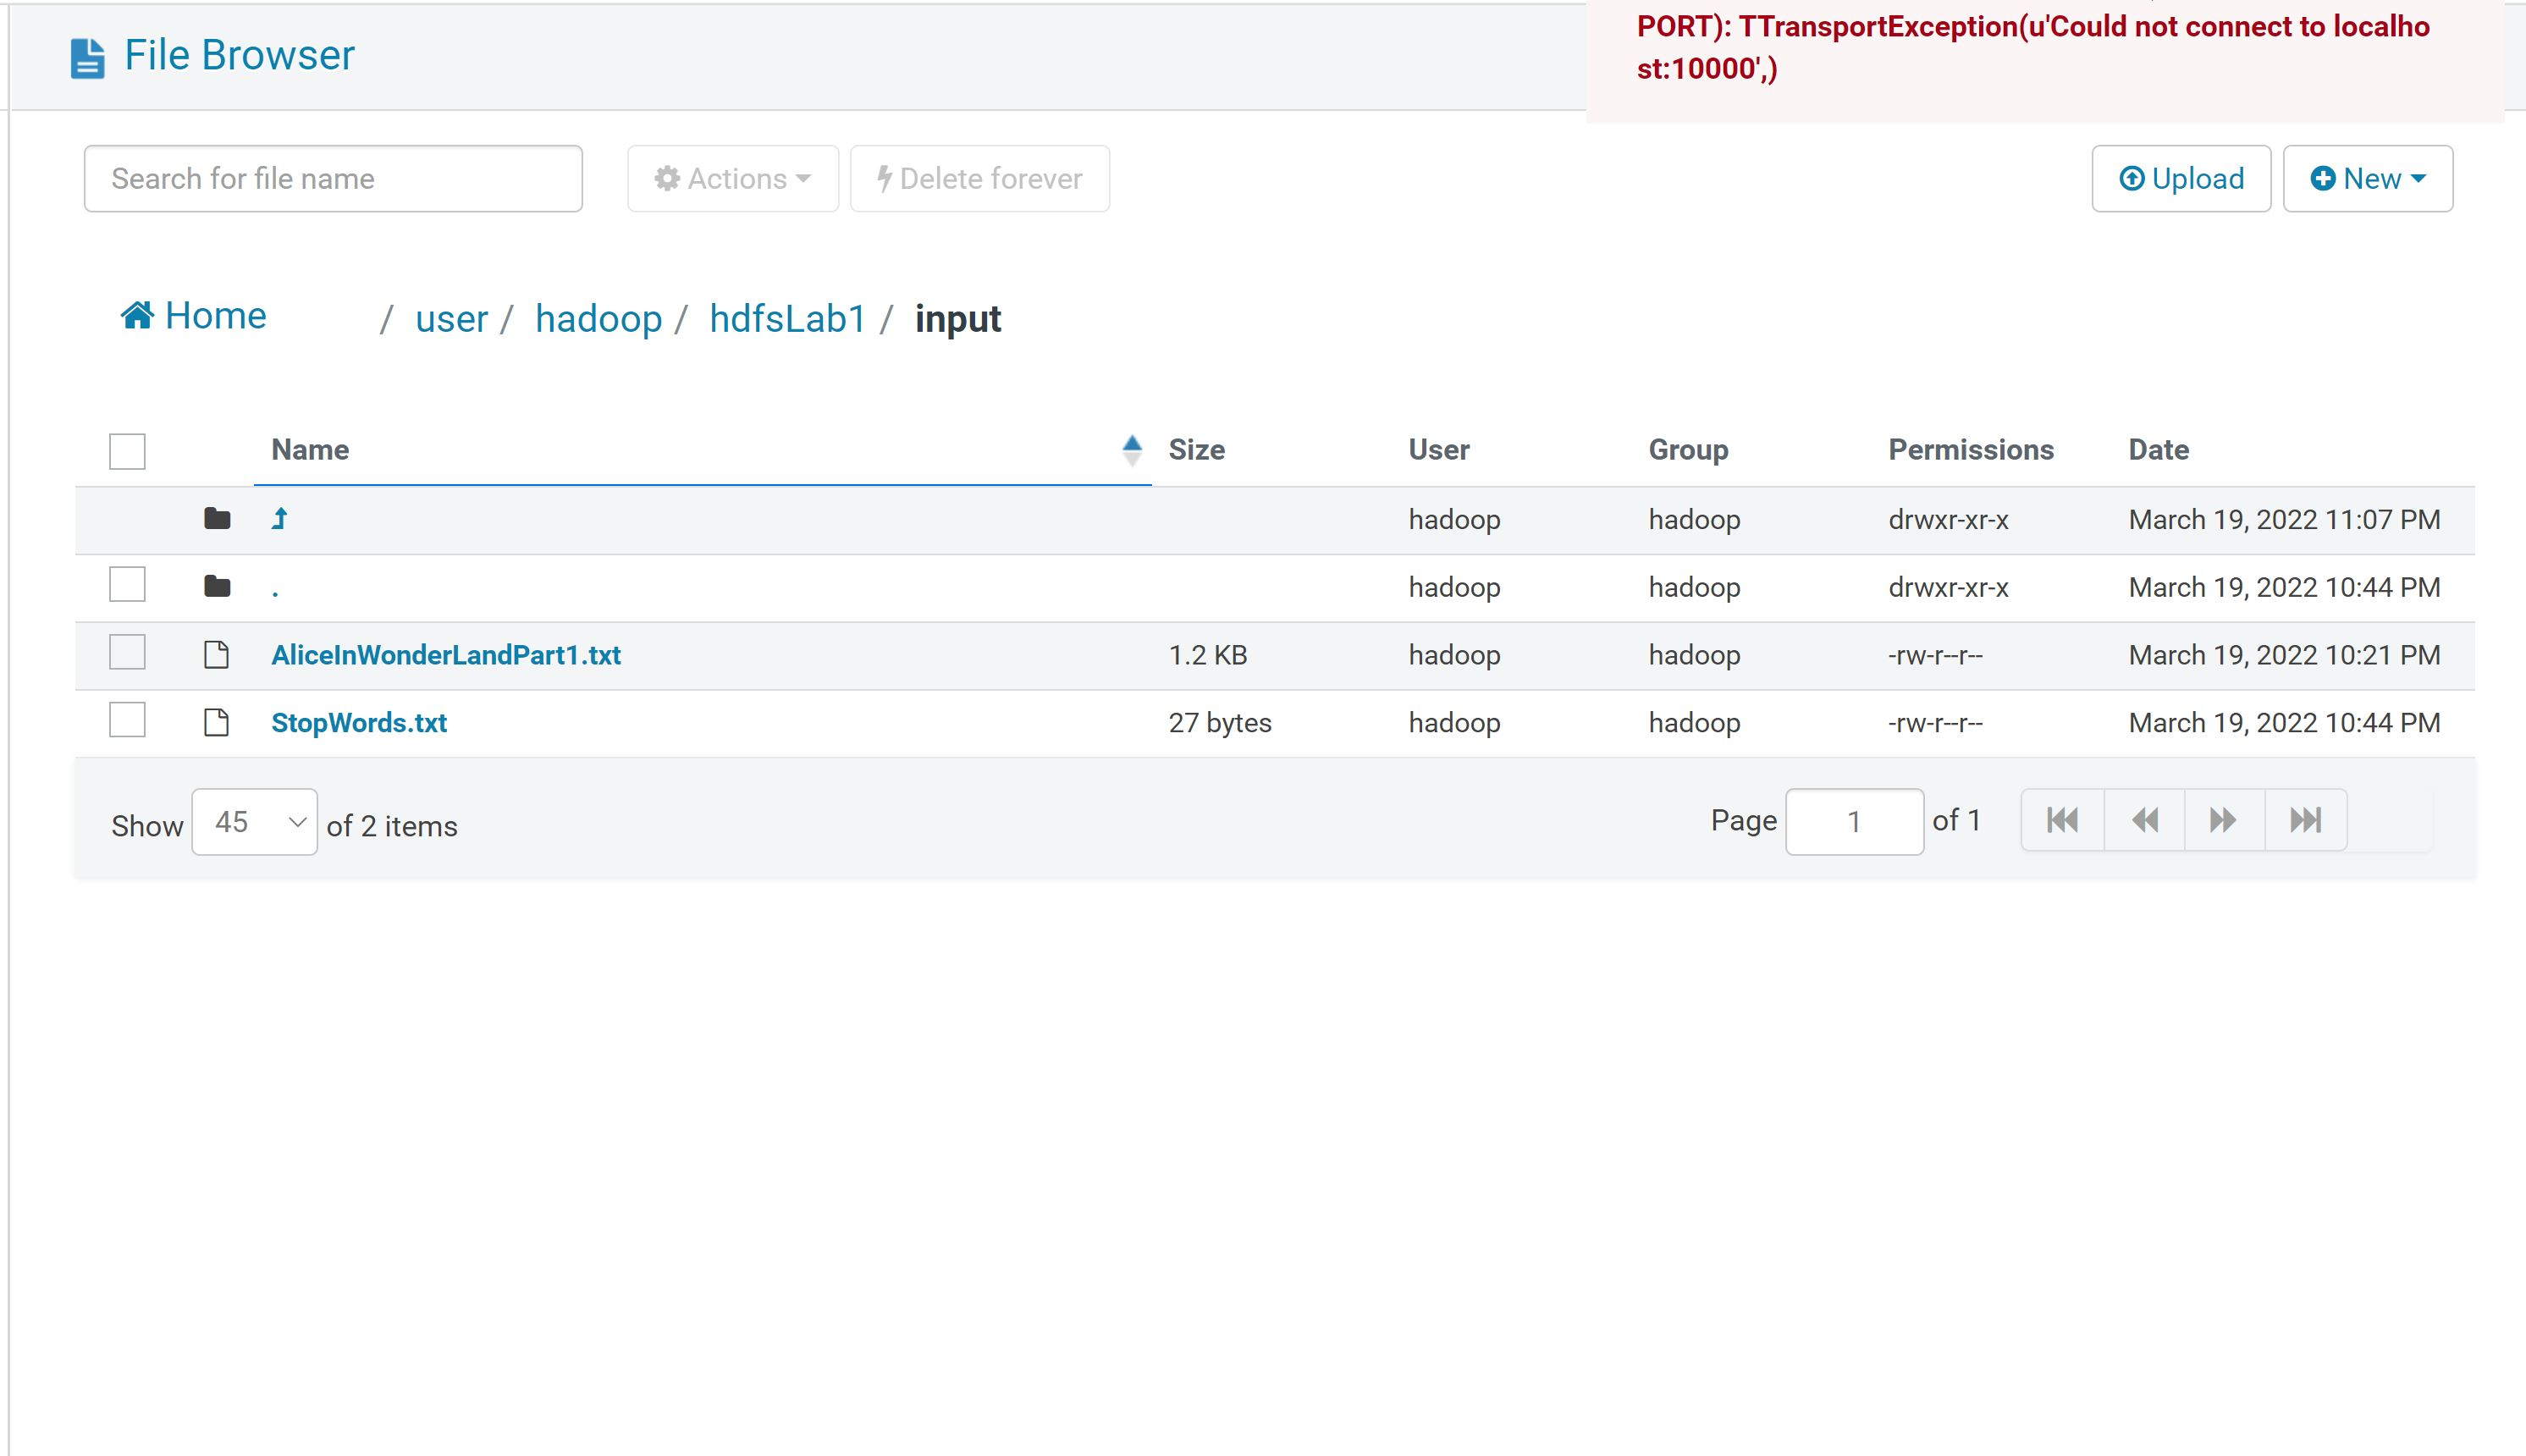

In [5]:
#screenshot3
from IPython.display import Image
Image(filename='alice.JPG')

In [ ]:
#screenshot4


In [ ]:
!sudo hadoop jar /home/bitnami/Labs/Lab1/WordCount.jar ee.ut.cs.dsg.bigdatamanagement.WordCount hdfsLab1/input hdfsLab1/output
hadoop fs -cat /your/file | head

### Task 2.1.1 Display the content of the first partition of the output in "/user/hadoop/hdfsLab1/output/"

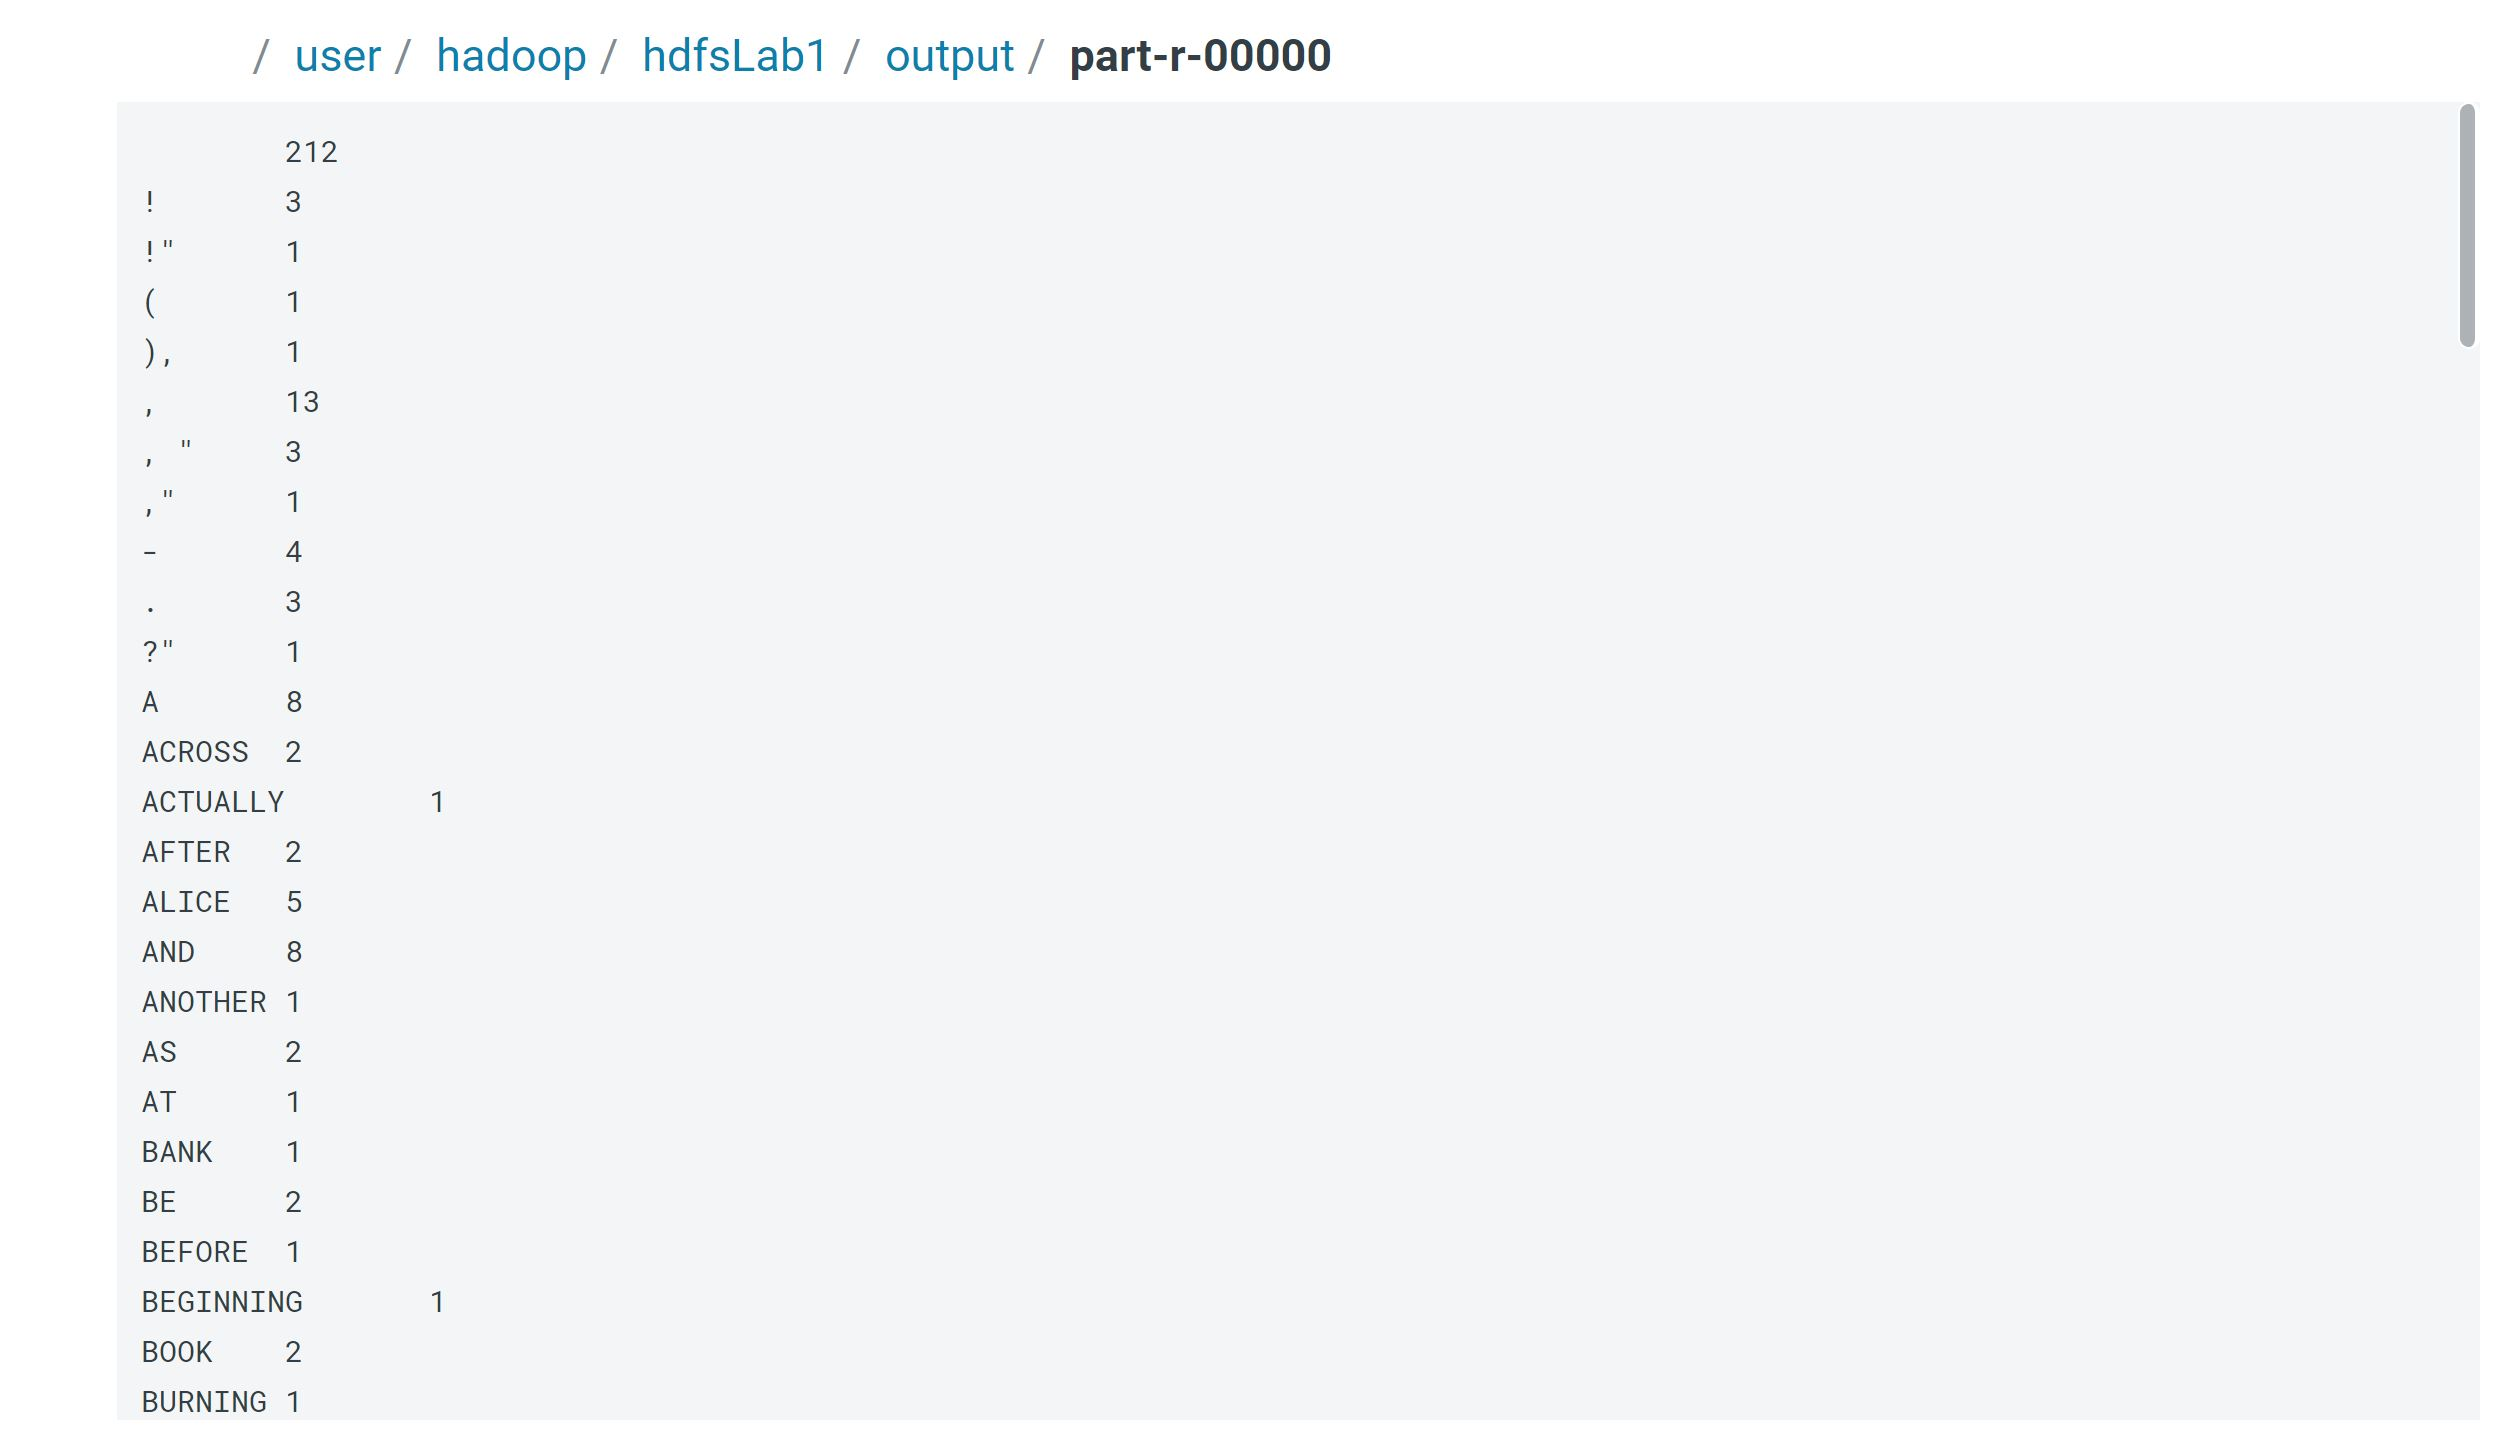

In [7]:
#open the file output and add a screenshot from the content of the file
#screenshot from the command and the content of the file
from IPython.display import Image
Image(filename='output.JPG')

### Task 2.1.2 Display the last 10 lines of the output

#screenshot from the last 10 lines , i tried the below command but it didn't work
#hadoop fs -ls /home/bitnami/Labs/Lab1/StopWords.txt | head -10


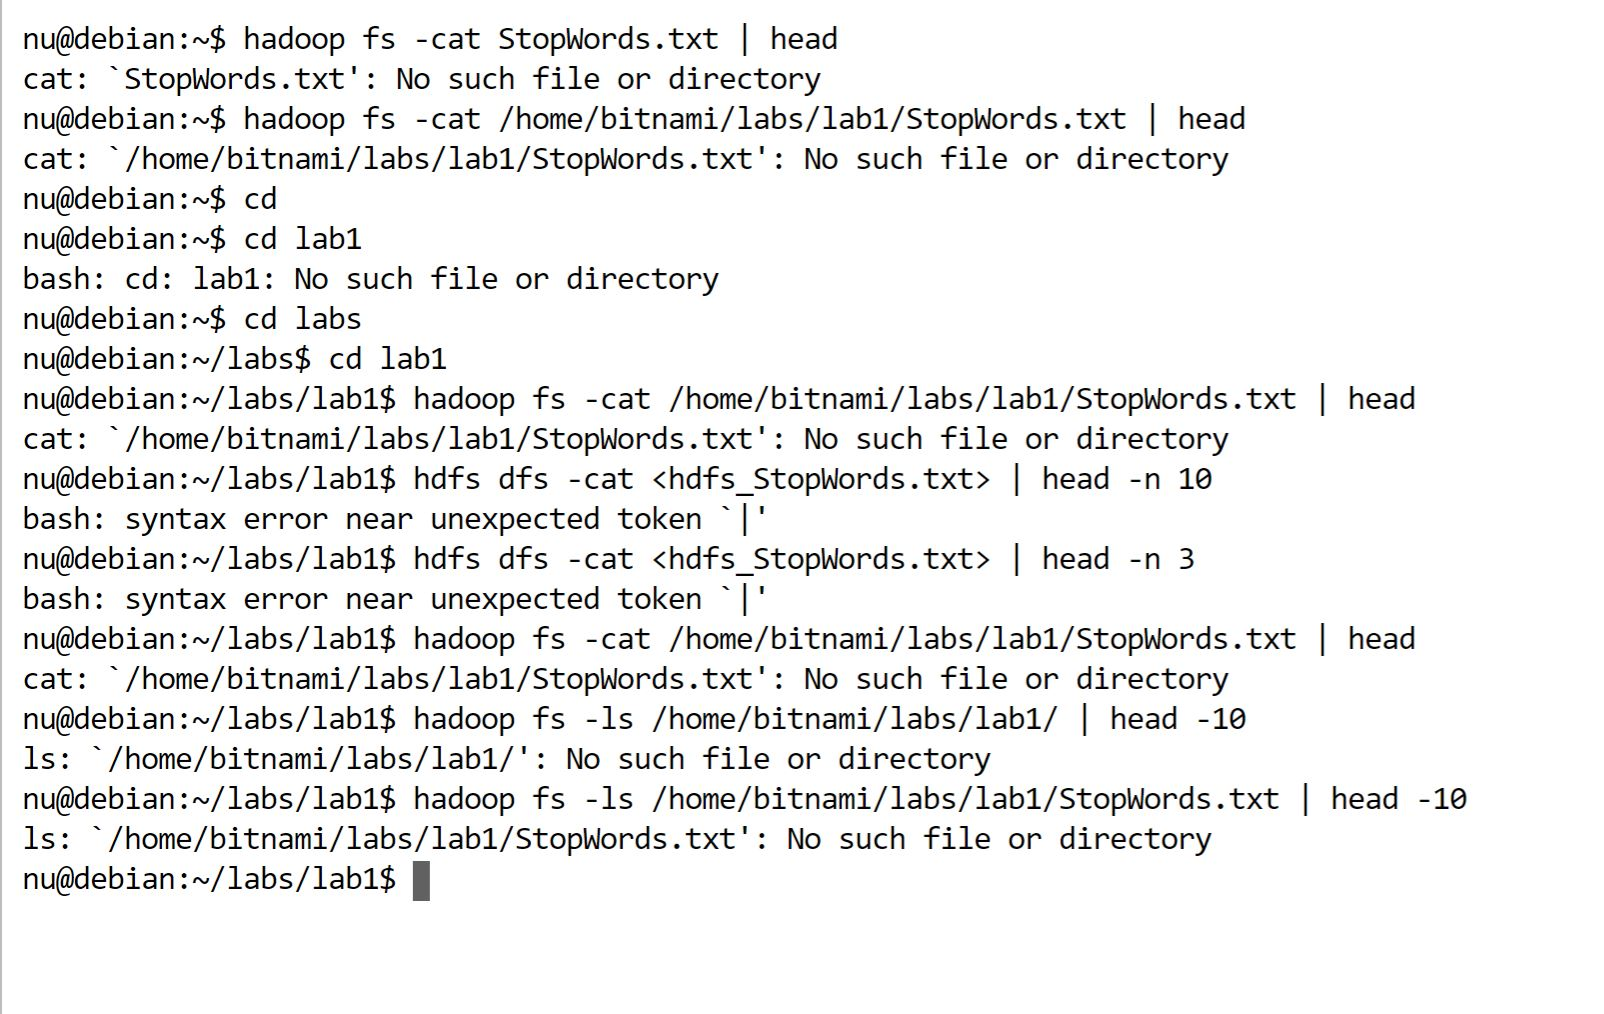

In [9]:
from IPython.display import Image
Image(filename='head.JPG')

### Task 2.2: Monitoring tasks in the Hadoop Web UI:
 You can monitor your running jobs from <a href="http://127.0.0.1:8088/"> Hadoop UI </a> in your browser. <br><br>
 
 You can find there details about your submitted jobs such as state, final status, configurations and many more.



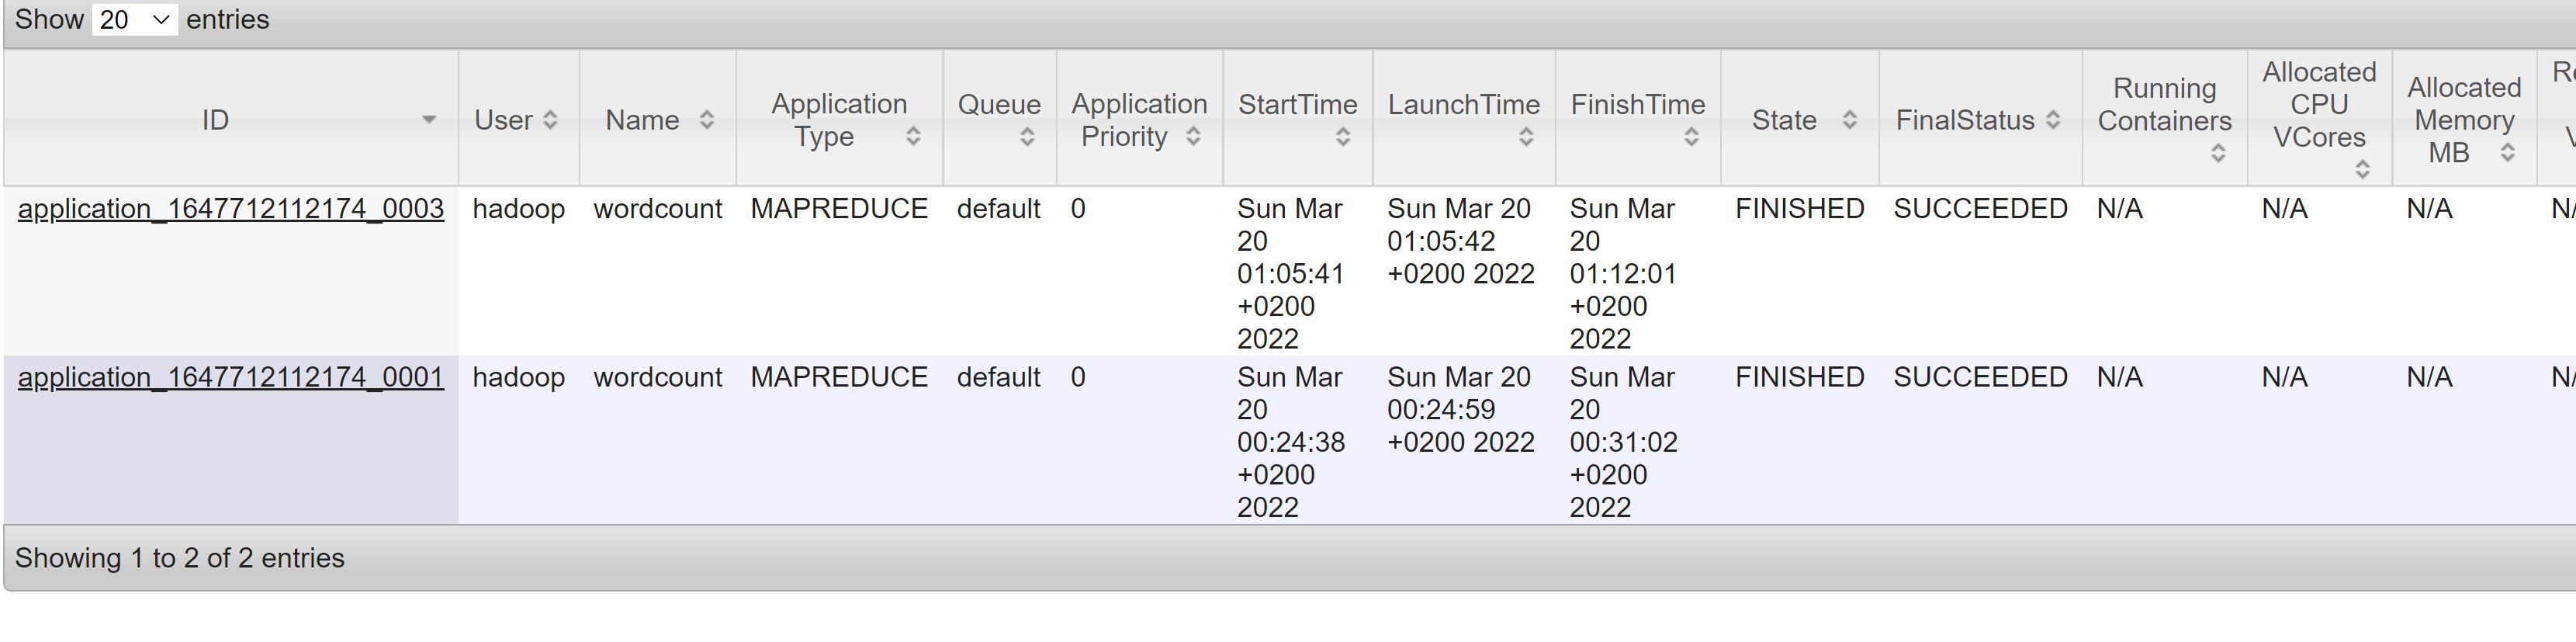

In [10]:
#Add here screenshot from the hadoop UI
from IPython.display import Image
Image(filename='Capture.JPG')


### Task 2.3: word count with excluding stop words (Distributed Cache)
In this task, we are going to exclude the words that we want to filter out (stop words). We will pass the set of stop words which we want to exclude using Distributed Cache mechanism.

In [ ]:
!sudo hadoop jar /home/bitnami/labs/lab1/WordCount.jar ee.ut.cs.dsg.bigdatamanagement.WordCountSkipStopWord hdfsLab1/input hdfsLab1/output2 -skip hdfsLab1/StopWords.txt

## Describe here the distributed cache technique in two lines maximum
<font color = "red">
**A distributed cache is a system that pools together the random-access memory (RAM) of multiple networked computers into a single in-memory data store used as a data cache to provide fast access to data**
    
</font>


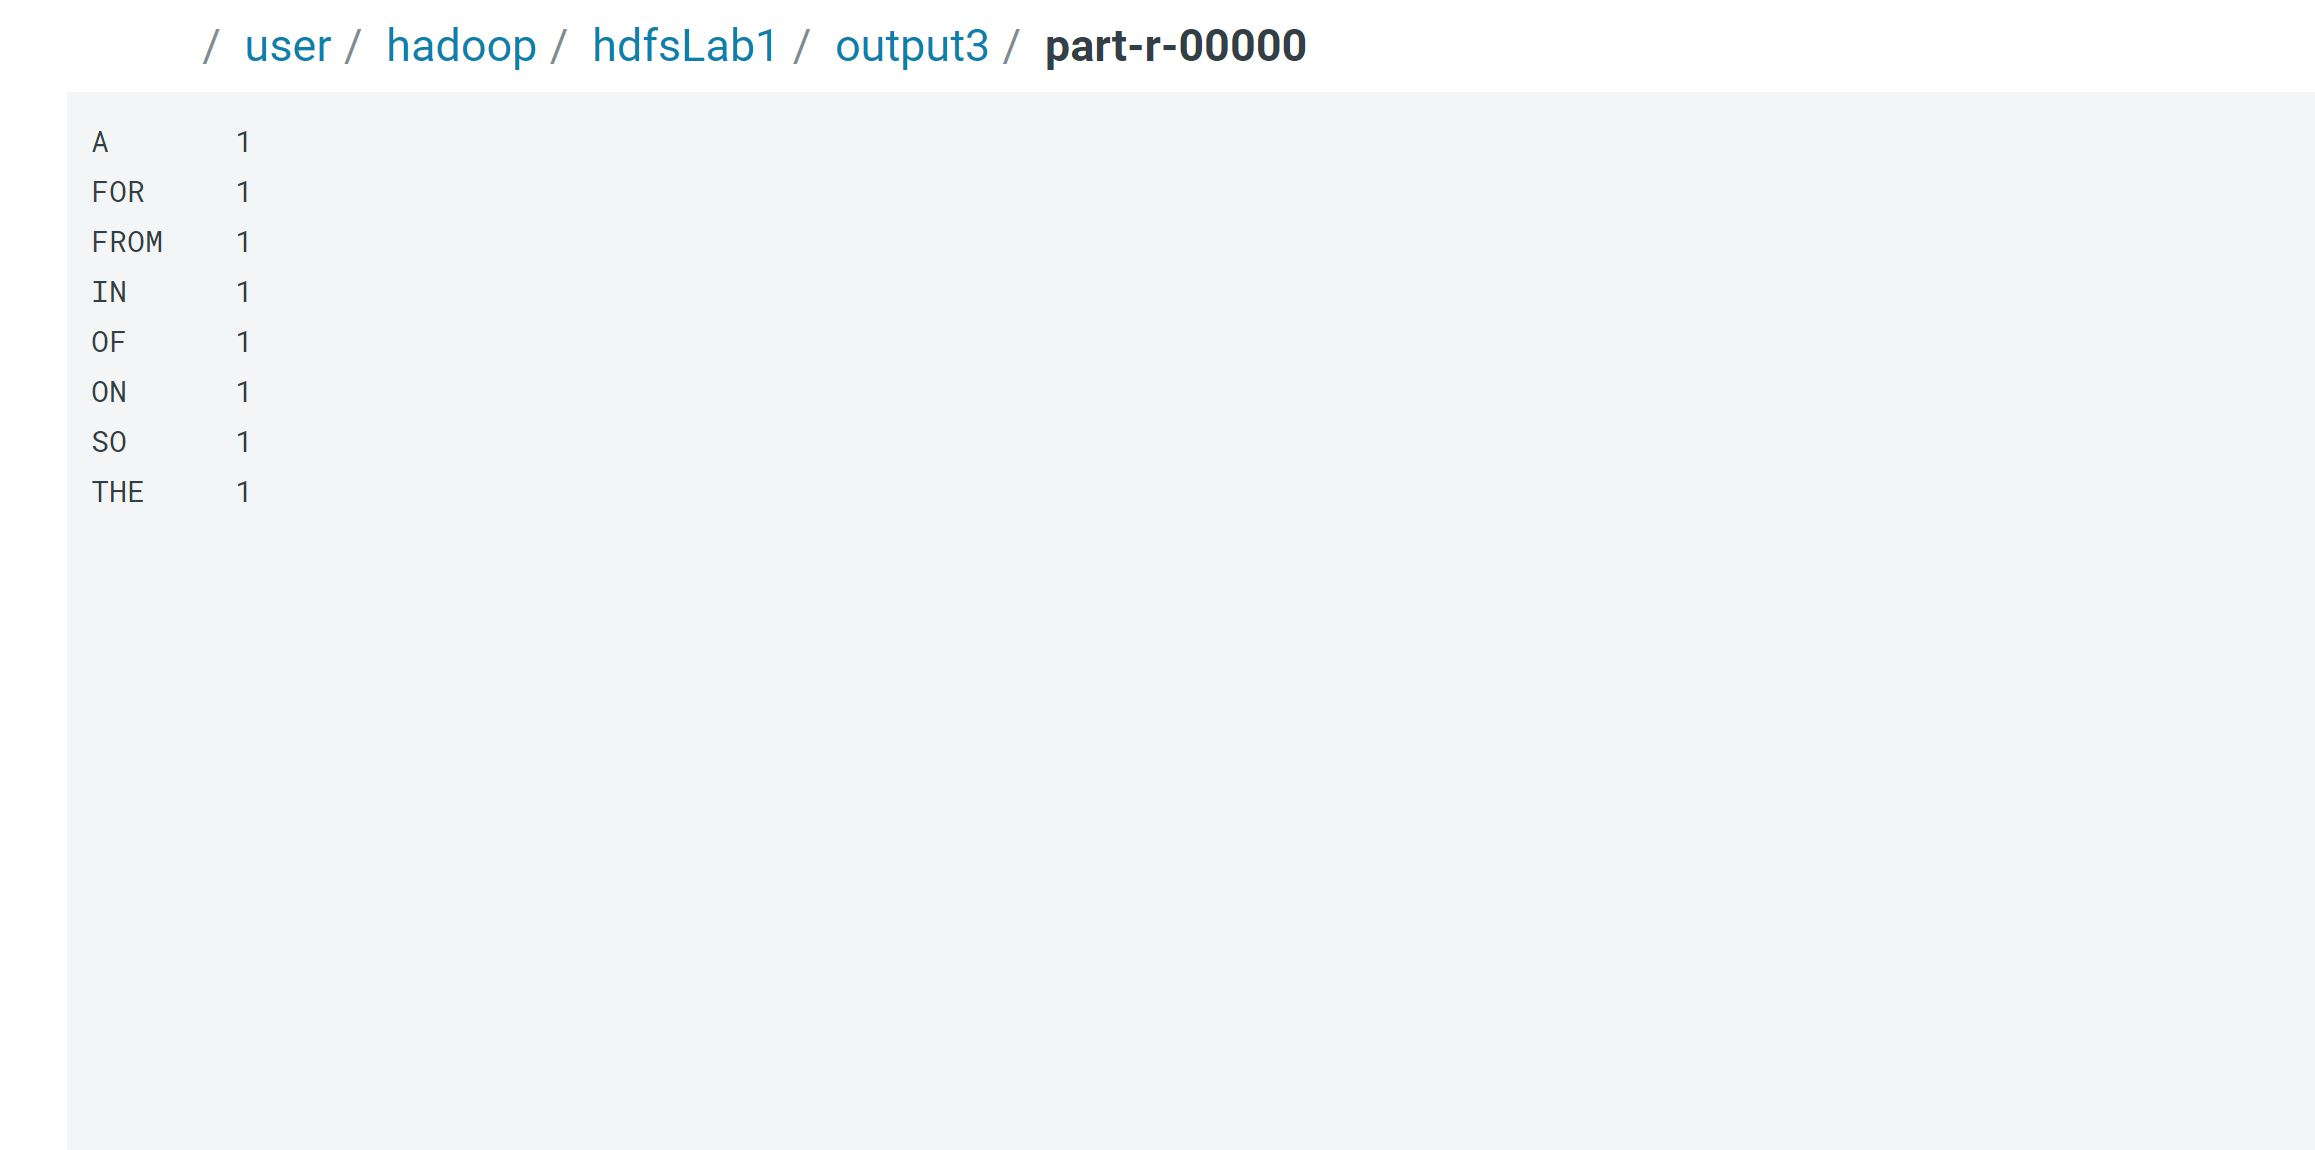

In [11]:
#Add screenshot from the output2 content

#screenshot
from IPython.display import Image
Image(filename='output3.JPG')

## How much time have you spent on this assignment?
##### This question won't affect your grade, it is used to improve the course assignments in the future. So, please try to be accurate as possible.
<font color = "red">
**4 hours **
</font>

## What is your feedback on the assignment (Give a rating from 1 to 5)?
##### This question won't affect your grade, it is used to improve the course assignments in the future.
<font color = "red">
**4**
</font>